# Project 1: Vinamra Rai (406306460)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import time

## Lecture 1

### 1. Generating Random Numbers and calculating probabilities

#### 1(a) Generate Binomial Distribution and Calculate Probability

In [63]:
# defining the constants for the LGM method
a = 7**5
b = 0
m = 2**31 - 1
lgm_seed = 5

# defining function to generate the next LGM random number
def lgm():
  global lgm_seed
  lgm_seed = (a * lgm_seed + b) % m
  return lgm_seed / m   # to keep the generated number from (0, 1)

# generating 44,000 uniformly distributed random numbers
random_numbers = np.array([lgm() for draws in range(44000)])

# displaying the random values for a check
random_numbers[:10]

array([3.91318463e-05, 6.57688941e-01, 7.78026611e-01, 2.93250660e-01,
       6.63836187e-01, 9.47959316e-02, 2.35223081e-01, 3.94323584e-01,
       3.96482029e-01, 6.73464480e-01])

In [34]:
# defining the parameters for the binomial distribution
n, p = 44, 0.64

# splitting the uniform random numbers into 1,000 groups of 44 (number of Binomial sims)
uniform_random_matrix = random_numbers.reshape(1000, n)

# counting how many numbers are less than p for the sucess outcome
binomial_random_variables = np.sum(uniform_random_matrix < p, axis=1)

# calculating the probability of X being at least 35
prob_X_greq_35 = np.mean(binomial_random_variables >= 35)
print('The probability of X being at least 35: ', prob_X_greq_35)

The probability of X being at least 35:  0.021


Actual Value = 0.02003 (from closed form solution)

#### 1(b) Generating Exponentially distributed numbers

Probability of X >= 1: 0.5045
Probability of X >= 4: 0.0674
Mean of the distribution: 1.4956564443986848
Standard Deviation of the distribution: 1.5087060092487206


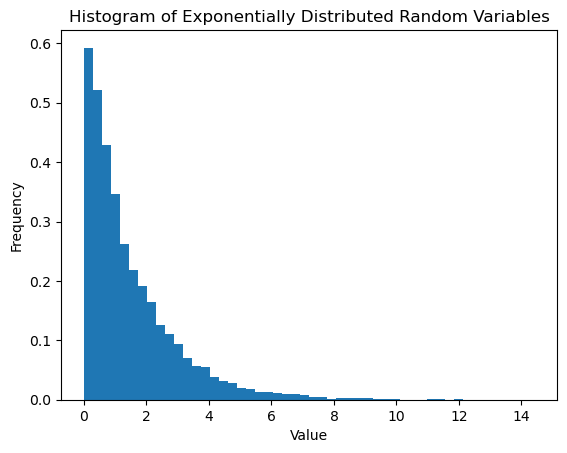

In [35]:
# defining the parameters for the Exponential distribution
lambda_exp = 1.5

# generating 10,000 uniform random numbers between 0 and 1 using the LGM function
random_numbers_exp = np.array([lgm() for draws in range(10000)])

# using Inverse transform method to generate Exponential RVs
exponential_rv = -np.log(1 - random_numbers_exp) * lambda_exp

# calculating probabilities
prob_X_greq_1 = np.mean(exponential_rv >= 1)
prob_X_greq_4 = np.mean(exponential_rv >= 4)

# calculating the first two moments of distribution
mean_exponential = np.mean(exponential_rv)
std_exponential = np.std(exponential_rv)

# printing statistics and other outputs
print(f"Probability of X >= 1: {prob_X_greq_1}")
print(f"Probability of X >= 4: {prob_X_greq_4}")
print(f"Mean of the distribution: {mean_exponential}")
print(f"Standard Deviation of the distribution: {std_exponential}")

# plotting histogram
plt.hist(exponential_rv, bins=50, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Exponentially Distributed Random Variables')
plt.show()

#### 1(c) Normally Distributed Variables using Box-Muller Method

In [36]:
# initializing a numpy array to store the normal distribution RVs
normal_rv_bm = np.array([])

# starting a counter for time
time_start_bm = time.time()

# generating pairs of uniform random numbers and transforming them using Box-Muller
U1 = np.array([lgm() for draws in range(100000)])
U2 = np.array([lgm() for draws in range(100000)])

Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

# concatenating Z1 and Z2 to the normal_rv arr
normal_rv_bm = np.concatenate((normal_rv_bm, Z1, Z2))

# ending the counter for time
time_end_bm = time.time()

print('The number of random variables generated is: ', len(normal_rv_bm))
print('The time taken to generate 200000 normally distributed random variables using Box-Muller Method is: ', (time_end_bm - time_start_bm))

The number of random variables generated is:  200000
The time taken to generate 200000 normally distributed random variables using Box-Muller Method is:  0.046560049057006836


#### 1(d) Normally Distributed Random Variables using Polar-Marsaglia Method

In [37]:
# initializing the list to store the normal random numbers
normal_rv_pm = []

time_start_pm = time.time()
count = 0

# generating pairs until 200000 normal random numbers
while len(normal_rv_pm) < 199999:

  U1, U2 = lgm(), lgm()

  # transforming U1 and U2 to V1 and V2
  V1 = 2 * U1 - 1
  V2 = 2 * U2 - 1
  W = V1**2 + V2**2

  # checking if W <= 1
  if W <= 1:
    # computing the Polar-Marsaglia transformed values
    transformation_factor = np.sqrt(-2 * np.log(W) / W)
    Z1 = V1 * transformation_factor
    Z2 = V2 * transformation_factor

    # adding Z1 and Z2 to the list
    normal_rv_pm.extend([Z1, Z2])

time_end_pm = time.time()

print('The number of random variables generated is: ', len(normal_rv_pm))
print('The time taken to generate 200000 normally distributed random variables using Polar-Marsaglia Method is: ', (time_end_pm - time_start_pm))

The number of random variables generated is:  200000
The time taken to generate 200000 normally distributed random variables using Polar-Marsaglia Method is:  0.17411422729492188


#### 1(e) Comparative Analysis of the times
The comparative analysis is attached in a separate PDF file.

## Lecture 2

### 2. Simulating Standard Wiener Process

#### 2(a) Estimate the expected values

In [38]:
# defining number of simulations and seed
np.random.seed(5)
num_sims = 100000

# timesteps at which we estimate expected values
timesteps = [1, 3, 5]

# simulating Wiener processes
wiener_processes = {t: np.random.normal(0, np.sqrt(t), num_sims) for t in timesteps}

# calculating A(t)
A_values = {t: np.mean(wiener_processes[t]**2 + np.sin(wiener_processes[t])) for t in timesteps}

# calculating B(t)
B_values = {t: np.mean(np.exp(t/2) * np.cos(wiener_processes[t])) for t in timesteps}

# storing the values in a dataframe for clean output
expected_values = {'t': timesteps,
      'A(t)': [A_values[t] for t in timesteps],
      'B(t)': [B_values[t] for t in timesteps]}

expected_values = pd.DataFrame(expected_values)

expected_values

,t,A(t),B(t)
0,1,1.006571,0.996797
1,3,2.990874,0.995631
2,5,4.982761,1.051633


#### 2(b) Relation between different values of B
Answer attached in a separate PDF file

#### 2(c) Variance Reduction technique to compute B(5)
Answer attached in a separate PDF file

In [39]:
# defining the timestep for B(5)
t = 5

# simulating the Wiener process W_t
W_t = wiener_processes[t]

# calculating the expected value and variance of B(5) before using control variate
B_5 = np.exp(t/2) * np.cos(W_t)
B_5_expected_1 = np.mean(B_5)
B_5_variance_1 = np.var(B_5)

# using cos(W_t) as the control variate as E(cos(W_t)) is zero and it also captures the non-linear nature of B(5)
control_variate = np.cos(W_t)
control_variate_expected = np.mean(control_variate)

# calculating the sample covariance between B(5) and the control variate
covariance = np.cov(B_5, control_variate)[0, 1]
control_variate_variance = np.var(control_variate)

# calculating the control variate coefficient and adjusting B(5)
coeff = covariance / control_variate_variance
B_5_adjusted = B_5 - coeff * (control_variate - control_variate_expected)

# calculating the expected value and variance of B(5) after using control variate
B_5_expected_2 = np.mean(B_5_adjusted)
B_5_variance_2 = np.var(B_5_adjusted)

# calculating the correlation between B(5) and the control variate
correlation = covariance / (np.sqrt(control_variate_variance) * np.sqrt(B_5_variance_1))

# calculating net variance reduction
variance_reduction = (B_5_variance_1 - B_5_variance_2) / B_5_variance_1

comparative_analysis = {
    'Original Expected Value': B_5_expected_1,
    'Original Variance': B_5_variance_1,
    'Updated Expected Value': B_5_expected_2,
    'Updated Variance': B_5_variance_2,
    'Reduction in Variance (%)': 100 * variance_reduction
}

comparative_analysis = pd.DataFrame([comparative_analysis])
comparative_analysis

,Original Expected Value,Original Variance,Updated Expected Value,Updated Variance,Reduction in Variance (%)
0,1.051633,72.987757,1.051633,7.298922e-09,100.0


### Problem 3: Calculating European Call Option Price

#### 3(a) Pricing European Call Option using Monte Carlo Simulations

In [40]:
# setting up seed and defining the parameters
np.random.seed(5)

S0 = 100
r = 0.055
sigma = 0.2
T = 5
X = 100  # Strike price
num_sims = 100000

# simulating the GBM for the stock price at time T
Wt = np.random.normal(0, np.sqrt(T), num_sims)
St = S0 * np.exp(sigma * Wt + (r - sigma**2 / 2) * T)

# calculating the payoff for the call option at time T using Feynman-Kac
option_payoff = np.exp(-r * T) * np.maximum(St - X, 0)

# estimating the price of the call option
ecall_option_mc = np.mean(option_payoff)

print("Estimated price of the European call option via Monte Carlo Simulation is (in $):", ecall_option_mc.round(4))

Estimated price of the European call option via Monte Carlo Simulation is (in $): 30.5761


#### 3(b) Pricing European Call Option using Black-Scholes Method

In [41]:
# calculating d1 and d2 for the Black-Scholes closed form solution
d1 = (np.log(S0 / X) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# computing the price of the European call option using the Black-Scholes formula
ecall_option_bs = S0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

print("Price of the European call option using Black-Scholes Method is (in $):", ecall_option_bs.round(4))

Price of the European call option using Black-Scholes Method is (in $): 30.3727


#### 3(c) Variation reduction using Antithetic Variates

In [42]:
# setting up seed and defining the parameters
np.random.seed(5)

# simulating the GBM for the stock price at time T using Antithetic Variates
St_antithetic = S0 * np.exp(sigma * (-Wt) + (r - sigma**2 / 2) * T)

# calculating the payoff for the call option at time T using Feynman-Kac for both paths
option_payoff_antithetic = np.exp(-r * T) * np.maximum(St_antithetic - X, 0)

# estimating the price of the call option using both standard and antithetic payoffs
option_payoff_combo = 0.5 * (option_payoff + option_payoff_antithetic)

# Estimated call option price using Antithetic Variates
ecall_option_mc_av = np.mean(option_payoff_combo)

# Variance of the estimator using standard Monte Carlo
variance_mc = np.var(option_payoff)

# Variance of the estimator using Antithetic Variates
variance_mc_av = np.var(option_payoff_combo)

# Variance reduction percentage
variance_reduction_percentage = 100 * (variance_mc - variance_mc_av) / variance_mc

# Display the results
print(f"Estimated call option price using Monte Carlo (in $): {np.mean(option_payoff):.4f}")
print(f"Estimated call option price using Antithetic Variates (in $): {ecall_option_mc_av:.4f}")
print(f"Variance using Monte Carlo: {variance_mc:.4f}")
print(f"Variance using Antithetic Variates: {variance_mc_av:.4f}")
print(f"Variance reduction: {variance_reduction_percentage:.2f}%")

Estimated call option price using Monte Carlo (in $): 30.5761
Estimated call option price using Antithetic Variates (in $): 30.4450
Variance using Monte Carlo: 1714.4094
Variance using Antithetic Variates: 410.8371
Variance reduction: 76.04%


### Problem 4: Simulating Stock Price Path

#### 4(a) Simulating path of the stock price

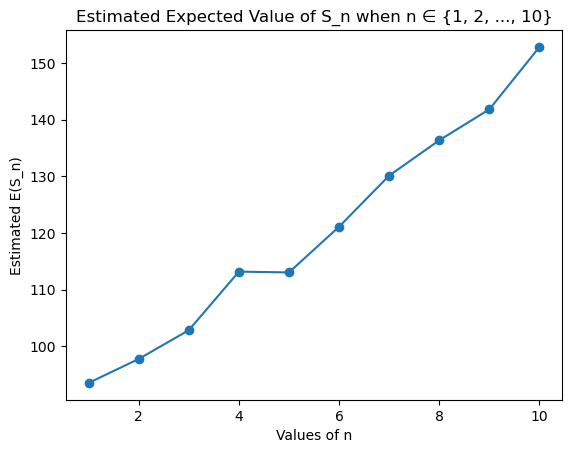

In [43]:
# setting up seed and defining the parameters
np.random.seed(5)

S0 = 88
sigma = 0.20
r = 0.055
num_sims = 1000

# declaring an empty list to store the estimated E(S_n)
E_Sn_vals = []

# Run simulations for n from 1 to 10
for n in range(1, 11):

    # simulating the Brownian motion increments
    Wt = np.random.normal(0, np.sqrt(n), num_sims)

    # calculating S_n using the GBM formula for each simulation
    Sn = S0 * np.exp((r - sigma**2 / 2) * n + sigma * Wt)

    # adding the value of E(S_n) as the mean of Sn
    E_Sn_vals.append(np.mean(Sn))

# plotting the estimated E(S_n) against n
plt.plot(range(1, 11), E_Sn_vals, marker='o')
plt.xlabel('Values of n')
plt.ylabel('Estimated E(S_n)')
plt.title('Estimated Expected Value of S_n when n ∈ {1, 2, ..., 10}')
plt.show()

#### 4(b) Simulating 3 separate paths of the stock price

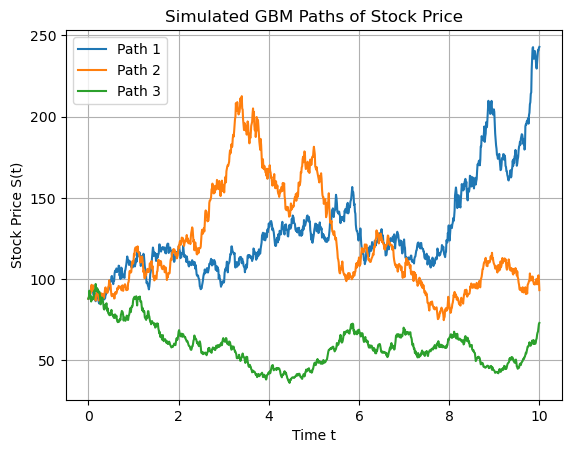

In [44]:
# setting up seed and defining the updated parameters
np.random.seed(5)

T = 10
dt = T / 1000
num_steps = 1000  # Number of steps
num_paths = 3  # Number of paths to simulate

# creating the different timepoints
t = np.linspace(0, T, num_steps + 1)

# creating an empty array to store the stock price progression (starting with S0)
S = np.zeros((num_steps + 1, num_paths))
S[0] = S0

# generating the 3 paths
for path in range(num_paths):
  for step in range(1, num_steps + 1):

    # drawing from a normal random variable
    Z_i = np.random.normal(0, 1)

    # adding the increments
    S[step, path] = S[step - 1, path] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_i)

# plotting the simulated paths
for path in range(num_paths):
    plt.plot(t, S[:, path], label=f'Path {path+1}')

plt.xlabel('Time t')
plt.ylabel('Stock Price S(t)')
plt.title('Simulated GBM Paths of Stock Price')
plt.legend()
plt.grid(True)
plt.show()

#### 4(c) Expected stock path and 3 simulated paths in one plot

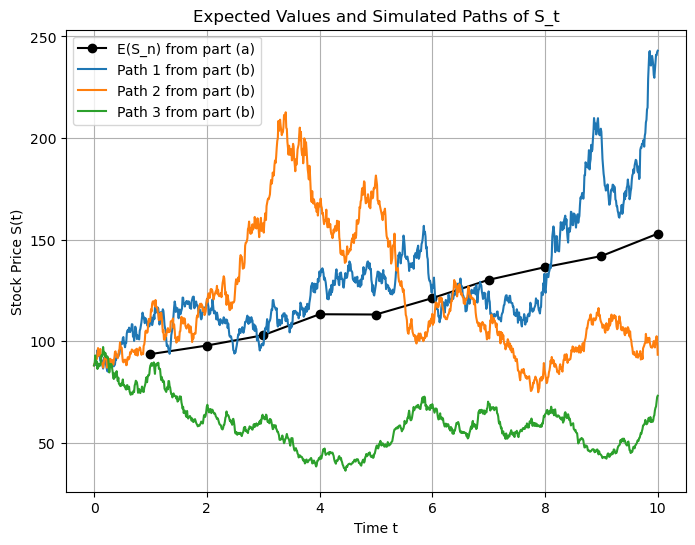

In [45]:
# plotting the combined data from parts a and b
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), E_Sn_vals, marker='o', color = 'black', label='E(S_n) from part (a)')
for path in range(num_paths):
    plt.plot(t, S[:, path], label=f'Path {path + 1} from part (b)')

plt.title('Expected Values and Simulated Paths of S_t')
plt.xlabel('Time t')
plt.ylabel('Stock Price S(t)')
plt.legend()
plt.grid(True)
plt.show()

#### 4(d) Impact of increased volatility on expected and simulated stock prices



Answer attached in a separate PDF file

## Lecture 3

### Problem 5: Option Pricing using Discretization and Greeks

#### 5(a) Euler's Discretization and European Call Option pricing

In [46]:
def calc_european_call_option_euler(S0, T, X, r, sigma, num_sims):

  # defining the time increment
  dt = T / num_sims
  steps = int(T / dt)

  # initializing an array to store the end stock prices
  end_prices = np.zeros(num_sims)

  for i in range(num_sims):
    S_t = S0
    for step in range(1, steps + 1):
      Z = np.random.normal()
      S_t += r * S_t * dt + sigma * S_t * np.sqrt(dt) * Z
    end_prices[i] = S_t

  # calculating the payoff for each simulation
  payoffs = np.maximum(end_prices - X, 0)

  # calculating option price from the payoffs using Feynman-Kac
  option_price = np.exp(-r * T) * np.mean(payoffs)

  # calculating the standard error of the estimate
  std_error = np.std(payoffs) / np.sqrt(num_sims)

  return option_price, std_error

In [47]:
# defining parameters for a sample output (using values from a previous question)
S0 = 100
T = 5
X = 100  # Strike price
r = 0.055
sigma = 0.2
num_sims = 1000

# computing the European call option price and the corresponding standard error
ecall_option_price, std_error = calc_european_call_option_euler(S0, T, X, r, sigma, num_sims)

print(f"European Call Option Price (in $): {ecall_option_price:.4f}")
print(f"Standard Error of the Estimate: {std_error:.4f}")

European Call Option Price (in $): 29.1262
Standard Error of the Estimate: 1.5849


#### 5(b) Milshtein's Discretization and European Call Option pricing

In [48]:
def calc_european_call_option_milshtein(S0, T, X, r, sigma, num_sims):

  # defining the time increment
  dt = T / num_sims
  steps = int(T / dt)

  # initializing an array to store the end stock prices
  end_prices = np.zeros(num_sims)

  for i in range(num_sims):
    S_t = S0
    for step in range(1, steps + 1):
      Z = np.random.normal()
      delta_W = np.sqrt(dt) * Z
      S_t += r * S_t * dt + sigma * S_t * delta_W + 0.5 * sigma**2 * S_t * (delta_W**2 - dt)
    end_prices[i] = S_t

  # calculating the payoff for each simulation
  payoffs = np.maximum(end_prices - X, 0)

  # calculating option price from the payoffs using Feynman-Kac
  option_price = np.exp(-r * T) * np.mean(payoffs)

  # calculating the standard error of the estimate
  std_error = np.std(payoffs) / np.sqrt(num_sims)

  return option_price, std_error

In [49]:
# computing the European call option price and the corresponding standard error
ecall_option_price, std_error = calc_european_call_option_milshtein(S0, T, X, r, sigma, num_sims)

print(f"European Call Option Price (in $): {ecall_option_price:.4f}")
print(f"Standard Error of the Estimate: {std_error:.4f}")

European Call Option Price (in $): 31.6477
Standard Error of the Estimate: 1.7712


#### 5(c) European Call Option pricing using Black-Scholes Formula

In [50]:
def approximate_normal_cdf(x):
  # defining the different d_i in an array
  d = [0.0498673470, 0.0211410061, 0.0032776263, 0.0000380036, 0.0000488906, 0.0000053830]
  if x >= 0:
    return 1 - 0.5 * (1 + d[0]*x + d[1]*(x**2) + d[2]*(x**3) + d[3]*(x**4) + d[4]*(x**5) + d[5]*(x**6))**(-16)
  else:
    return 1 - approximate_normal_cdf(-x)

In [51]:
def calc_european_call_option_bsm(S0, T, X, r, sigma):

  # calculating d1 and d2 using the Black-Scholes formula components
  d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  # calculating the call option price using the approximation of the CDF
  call_price = S0 * approximate_normal_cdf(d1) - X * np.exp(-r * T) * approximate_normal_cdf(d2)
  return call_price

# computing the option price using the same parameters as before
price = calc_european_call_option_bsm(S0, T, X, r, sigma)

print(f"The price of the European call option is (in $): {price:.4f}")

The price of the European call option is (in $): 30.3726


#### 5(d) Comparison between Euler's and Milshtein's Discretization

In [52]:
# Parameters for the question

X = 100  # Strike price
sigma = 0.25
r = 0.055
T = 0.5
num_sims = 1000
S0_values = range(95, 105)

# creating a dataframe to store results
comparison_df = pd.DataFrame(index=S0_values, columns=["Euler Price", "Euler Std Error", "Milstein Price", "Milstein Std Error", "BSM Price"])

# calculating the prices using Euler and Milstein schemes, as well as the BSM formula with N(.) approximation
for S0 in S0_values:
    euler_price, euler_std_error = calc_european_call_option_euler(S0, T, X, r, sigma, num_sims)
    milstein_price, milstein_std_error = calc_european_call_option_milshtein(S0, T, X, r, sigma, num_sims)
    bsm_price = calc_european_call_option_bsm(S0, T, X, r, sigma)

    comparison_df.loc[S0] = [euler_price, euler_std_error, milstein_price, milstein_std_error, bsm_price]

# Print out the DataFrame for the user to check
comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={'index': 'S0'}, inplace=True)
comparison_df

,S0,Euler Price,Euler Std Error,Milstein Price,Milstein Std Error,BSM Price
0,95,6.093664,0.33916,5.2246,0.322383,5.688951
1,96,5.906561,0.311848,6.47439,0.337017,6.182333
2,97,6.289305,0.339605,6.459504,0.339642,6.699223
3,98,6.860547,0.362899,7.856926,0.37838,7.239329
4,99,7.681349,0.382469,7.862351,0.380283,7.802283
5,100,7.733764,0.384682,7.98144,0.390981,8.387628
6,101,9.571805,0.419875,8.970496,0.42704,8.994862
7,102,9.398707,0.425544,9.319901,0.418271,9.623445
8,103,9.996552,0.434561,10.221695,0.45066,10.272787
9,104,10.703675,0.442653,11.491078,0.49255,10.94226


#### 5(e) Estimation of the European Call Option Greeks

In [53]:
def calc_european_call_option_bsm2(S0, X, T, r, sigma):
  d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  call_price = S0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
  return call_price

In [54]:
# defining functions for Greeks calculations using finite differences

def calculate_delta(S0, K, r, sigma, T, epsilon):
  C_plus = calc_european_call_option_bsm2(S0 + epsilon, K, T, r, sigma)
  C_minus = calc_european_call_option_bsm2(S0 - epsilon, K, T, r, sigma)
  delta = (C_plus - C_minus) / (2 * epsilon)
  return delta

def calculate_gamma(S0, K, r, sigma, T, epsilon):
  C_plus = calc_european_call_option_bsm2(S0 + epsilon, K, T, r, sigma)
  C = calc_european_call_option_bsm2(S0, K, T, r, sigma)
  C_minus = calc_european_call_option_bsm2(S0 - epsilon, K, T, r, sigma)
  gamma = (C_plus - (2 * C) + C_minus) / (epsilon ** 2)
  return gamma

def calculate_theta(S0, K, r, sigma, T, dt):
  C = calc_european_call_option_bsm2(S0, K, T, r, sigma)
  C_minus = calc_european_call_option_bsm2(S0, K, T - dt, r, sigma)
  theta = (C - C_minus) / dt
  return theta

def calculate_vega(S0, K, r, sigma, T, epsilon):
  C = calc_european_call_option_bsm2(S0, K, T, r, sigma)
  C_plus = calc_european_call_option_bsm2(S0, K, T, r, sigma + epsilon)
  vega = (C_plus - C) / epsilon
  return vega

In [55]:
# defining the new parameters
X = 100  # Strike price
sigma = 0.25
r = 0.055
T = 0.5
dt = 0.05  # Time step for theta
epsilon = 0.01

# defining range of values for stock prices
S0_values = np.arange(95, 106, 1)

# declaring empty arrays for Greeks
Deltas = []
Gammas = []
Thetas = []
Vegas = []

# calculating Greeks for each S0 in the range
for S0 in S0_values:
  delta = calculate_delta(S0, X, r, sigma, T, epsilon)
  gamma = calculate_gamma(S0, X, r, sigma, T, epsilon)
  theta = calculate_theta(S0, X, r, sigma, T, dt)
  vega = calculate_vega(S0, X, r, sigma, T, epsilon)

  # appending the calculated Greeks
  Deltas.append(delta)
  Gammas.append(gamma)
  Thetas.append(theta)
  Vegas.append(vega)

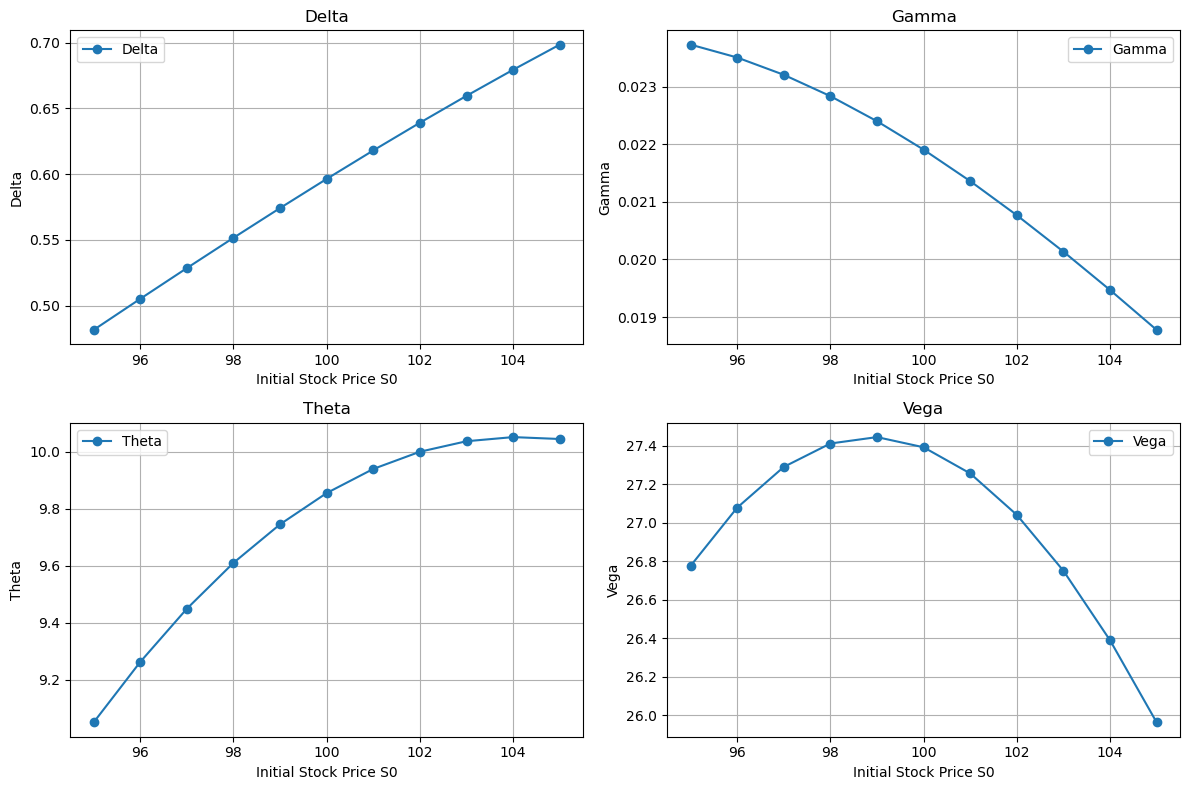

In [56]:
# plotting the Greeks
plt.figure(figsize=(12, 8))

# Delta
plt.subplot(2, 2, 1)
plt.plot(S0_values, Deltas, label='Delta', marker='o')
plt.title('Delta')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()

# Gamma
plt.subplot(2, 2, 2)
plt.plot(S0_values, Gammas, label='Gamma', marker='o')
plt.title('Gamma')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Gamma')
plt.grid(True)
plt.legend()

# Theta
plt.subplot(2, 2, 3)
plt.plot(S0_values, Thetas, label='Theta', marker='o')
plt.title('Theta')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Theta')
plt.grid(True)
plt.legend()

# Vega
plt.subplot(2, 2, 4)
plt.plot(S0_values, Vegas, label='Vega', marker='o')
plt.title('Vega')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Vega')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Problem 6: Heston Model and Price Estimation using three different methods

In [57]:
# setting random seed for reproducibility and defining the parameters
np.random.seed(5)
rho = -0.6
r = 0.055
S0 = 100
K = 100
v0 = 0.05
sigma = 0.42
alpha = 5.8
beta = 0.0625
num_paths = 10000
num_steps = 100
T = 5
dt = 0.05

def generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, handling_method):
    S = np.zeros((num_paths, num_steps + 1))
    v = np.zeros((num_paths, num_steps + 1))
    S[:, 0] = S0
    v[:, 0] = v0

    for i in range(num_paths):
        for t in range(1, num_steps + 1):
            dW1 = np.random.normal(0, np.sqrt(dt))
            dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt))

            if handling_method == "Full Truncation":
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(np.maximum(v[i, t-1], 0)) * S[i, t-1] * dW1
                v[i, t] = np.maximum(v[i, t-1], 0) + alpha * (beta - np.maximum(v[i, t-1], 0)) * dt + sigma * np.sqrt(np.maximum(v[i, t-1], 0)) * dW2
            elif handling_method == "Partial Truncation":
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(np.maximum(v[i, t-1], 0)) * S[i, t-1] * dW1
                v[i, t] = v[i, t-1] + alpha * (beta - v[i, t-1]) * dt + sigma * np.sqrt(np.maximum(v[i, t-1], 0)) * dW2
            elif handling_method == "Reflection":
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(abs(v[i, t-1])) * S[i, t-1] * dW1
                v[i, t] = abs(v[i, t-1]) + alpha * (beta - abs(v[i, t-1])) * dt + sigma * np.sqrt(abs(v[i, t-1])) * dW2

    return S, v

def calculate_call_option_price(S, K, r, dt, T):
    payoffs = np.maximum(S[:, -1] - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoffs)
    return call_price

In [58]:
# simulating stock price paths and calculate option prices for different handling methods using Heston Model
S_full_truncation, v_full_truncation = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Full Truncation")
call_price_full_truncation = calculate_call_option_price(S_full_truncation, K, r, dt, T)
print("Full Truncation Method Call Option Price (in $):", call_price_full_truncation)

S_partial_truncation, v_partial_truncation = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Partial Truncation")
call_price_partial_truncation = calculate_call_option_price(S_partial_truncation, K, r, dt, T)
print("Partial Truncation Method Call Option Price (in $):", call_price_partial_truncation)

S_reflection, v_reflection = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Reflection")
call_price_reflection = calculate_call_option_price(S_reflection, K, r, dt, T)
print("Reflection Method Call Option Price (in $):", call_price_reflection)

Full Truncation Method Call Option Price (in $): 33.376145802240195
Partial Truncation Method Call Option Price (in $): 33.89365194808772
Reflection Method Call Option Price (in $): 33.27346320480218


In [64]:
# setting random seed for reproducibility and defining the parameters
np.random.seed(5)
rho = -0.6
r = 0.055
S0 = 100
K = 100
v0 = 0.05
sigma = 0.42
alpha = 5.8
beta = 0.0625
num_paths = 10000
num_steps = 100
T = 5
dt = 0.05

def generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, handling_method):
    S = np.zeros((num_paths, num_steps + 1))
    v = np.zeros((num_paths, num_steps + 1))
    S[:, 0] = S0
    v[:, 0] = v0

    for i in range(num_paths):
        for t in range(1, num_steps + 1):
            dW1 = np.random.normal(0, np.sqrt(dt))
            dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt))

            if handling_method == "Full Truncation":
                v[i, t] = np.maximum(v[i, t-1], 0) + alpha * (beta - np.maximum(v[i, t-1], 0)) * dt + sigma * np.sqrt(np.maximum(v[i, t-1], 0)) * dW2
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(np.maximum(v[i, t-1], 0)) * S[i, t-1] * dW1
                
            elif handling_method == "Partial Truncation":
                v[i, t] = v[i, t-1] + alpha * (beta - v[i, t-1]) * dt + sigma * np.sqrt(np.maximum(v[i, t-1], 0)) * dW2
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(np.maximum(v[i, t-1], 0)) * S[i, t-1] * dW1
                
            elif handling_method == "Reflection":
                v[i, t] = abs(v[i, t-1]) + alpha * (beta - abs(v[i, t-1])) * dt + sigma * np.sqrt(abs(v[i, t-1])) * dW2
                S[i, t] = S[i, t-1] + r * S[i, t-1] * dt + np.sqrt(abs(v[i, t-1])) * S[i, t-1] * dW1
                

    return S, v

def calculate_call_option_price(S, K, r, dt, T):
    payoffs = np.maximum(S[:, -1] - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoffs)
    return call_price

In [65]:
# simulating stock price paths and calculate option prices for different handling methods using Heston Model
S_full_truncation, v_full_truncation = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Full Truncation")
call_price_full_truncation = calculate_call_option_price(S_full_truncation, K, r, dt, T)
print("Full Truncation Method Call Option Price (in $):", call_price_full_truncation)

S_partial_truncation, v_partial_truncation = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Partial Truncation")
call_price_partial_truncation = calculate_call_option_price(S_partial_truncation, K, r, dt, T)
print("Partial Truncation Method Call Option Price (in $):", call_price_partial_truncation)

S_reflection, v_reflection = generate_heston_paths(rho, r, S0, v0, sigma, alpha, beta, "Reflection")
call_price_reflection = calculate_call_option_price(S_reflection, K, r, dt, T)
print("Reflection Method Call Option Price (in $):", call_price_reflection)

Full Truncation Method Call Option Price (in $): 33.376145802240195
Partial Truncation Method Call Option Price (in $): 33.89365194808772
Reflection Method Call Option Price (in $): 33.27346320480218


### Problem 7: Halton Sequences to compute an integral

In [59]:

def halton_sequence_breakpoints(index, base):
    result = 0
    f = 1 / base
    i = index
    while i > 0:
        result += f * (i % base)
        i = i // base
        f = f / base
    return result

def generate_halton_sequence(base, n):
    return np.array([halton_sequence_breakpoints(i, base) for i in range(1, n + 1)])

def integration_func(x, y):
    return np.exp(-x * y) * (np.sin(6 * np.pi * x) + np.cbrt(np.cos(2 * np.pi * y)))

def compute_integration(n):
    x = generate_halton_sequence(2, n)  # getting Halton sequence for base 2
    y = generate_halton_sequence(3, n)  # getting Halton sequence for base 3
    integral_values = integration_func(x, y)
    return np.mean(integral_values)

In [60]:
# defining parameters and the seed
np.random.seed(5)
sample = 10000

# estimating the integral
integral_est = compute_integration(sample)
print(f"The estimated value of the integral using 2-D Halton sequences is: {integral_est}")

The estimated value of the integral using 2-D Halton sequences is: 0.0262619735093144
